In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Google Drive path where project material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Dissertation'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2013_to_2018_filtered.csv', 'FINAL_unbalancedData.csv', 'Final_balanced_data.csv', 'Cleaned_data.csv', 'accepted_2013_to_2018_latest1.csv', 'accepted_2013_to_2018_latest.csv', 'accepted_2007_to_2018q4.csv.zip', 'Cleaned_data_dummy.csv', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'y_data.csv', 'x_data.csv', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'ANN_model.joblib', 'Decsion_tree_model.joblib', 'Random_fores.joblib', '4_Individual_loans_hypothesisTesting_and_undersampling.ipynb', 'FINAL_balancedData_testing.csv', 'XGBoost_model.joblib', 'Untitled0.ipynb', 'Logistic_Regression.joblib', 'Model_5_ANN.ipynb', 'Model_4_XGBoost.ipynb', 'Model_3_Random_Forest.ipynb', 'Model_2_Decesion_Tree.ipynb', 'Model_1_Logistic_regression.ipynb', 'Random_forest_model_feature_selection_and_encoding.ipynb', 'XGBoost_model_feature_selection_and_encoding.ipynb', 'XAI_RandomForest.ipynb', '1_Filter_data_2013_to_2018.ipynb', '2_Filter_data_on_Loan_status.ipynb', 'Copy of 3_Filter 

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'FINAL_unbalancedData.csv')) #read data obtained after EDA and data cleaning

In [ ]:
pd.set_option('display.max_columns', None) #to display all features
pd.set_option('display.max_rows', None)#to display all observations

In [ ]:
df.head() #display top 5 observation

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category,emp_length_years,term_years,fico_score,credit_history_years
0,68407277,3600.0,36 months,13.99,C,C4,leadman,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.0,1.0,30.0,999.0,7.0,0.0,2765.0,29.7,13.0,w,821.72,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,debt_consolidation,10.0,3,677.0,12.33
1,68355089,24700.0,36 months,11.99,C,C1,Engineer,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,1.0,4.0,6.0,999.0,22.0,0.0,21470.0,19.2,38.0,w,979.66,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,small_business,10.0,3,717.0,16.00
2,68476807,10400.0,60 months,22.45,F,F1,Contract Specialist,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,1.0,3.0,12.0,999.0,12.0,0.0,21929.0,64.5,35.0,w,1340.50,0.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,major_purchase,3.0,5,697.0,17.50
3,68426831,11950.0,36 months,13.44,C,C3,Veterinary Tecnician,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.0,0.0,999.0,999.0,5.0,0.0,8822.0,68.4,6.0,w,1758.95,0.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,debt_consolidation,4.0,3,692.0,28.16
4,68476668,20000.0,36 months,9.17,B,B2,Vice President of Recruiting Operations,MORTGAGE,180000.0,Not Verified,Fully Paid,debt_consolidation,MN,14.67,0.0,0.0,49.0,999.0,12.0,0.0,87329.0,84.5,27.0,f,1393.80,0.0,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N,debt_consolidation,10.0,3,682.0,25.50


In [ ]:
df.isna().sum()

,0
id,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,0
home_ownership,0
annual_inc,0
verification_status,0


In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
loan_num_col = df.select_dtypes(np.number).columns.to_list() #Numerical columns
loan_cat_col = df.select_dtypes(include = [ 'object']).columns.to_list() #categorical columns

In [ ]:
#code adapted from principle of data science coursework
#chi square testig for categorical features
#Accepting null hypothesis means, there is no significance difference between the two class , here its default and fully paid
list1 = [] #to store p_value
list2 = [] # to store column name

for col in loan_cat_col:
    df_ctab = pd.crosstab(df[col], df['loan_status'])
    values_arr = df_ctab.values
    chi_test = chi2_contingency(values_arr)
    p_value = chi_test.pvalue
    if p_value < 0.01:
        print( "Reject null hypothesis for", col)
        list1.append(p_value)
        list2.append(col)
    else:
        print("Accept the null hypothesis for", col)

Reject null hypothesis for term
Reject null hypothesis for grade
Reject null hypothesis for sub_grade
Reject null hypothesis for emp_title
Reject null hypothesis for home_ownership
Reject null hypothesis for verification_status
Reject null hypothesis for loan_status
Reject null hypothesis for purpose
Reject null hypothesis for addr_state
Reject null hypothesis for initial_list_status
Accept the null hypothesis for hardship_flag
Accept the null hypothesis for disbursement_method
Reject null hypothesis for debt_settlement_flag
Reject null hypothesis for purpose_category


In [ ]:
#code adapted from principle of data science coursework
list1 = [] #to store p_value
list2 = [] # to store column name

for col in loan_cat_col:
    df_ctab = pd.crosstab(df[col], df['loan_status'])
    values_arr = df_ctab.values
    chi_test = chi2_contingency(values_arr)
    p_value = chi_test.pvalue
    if p_value < 0.05:
        print( "Reject null hypothesis for", col)
        list1.append(p_value)
        list2.append(col)
    else:
        print("Accept the null hypothesis for", col)

Reject null hypothesis for term
Reject null hypothesis for grade
Reject null hypothesis for sub_grade
Reject null hypothesis for emp_title
Reject null hypothesis for home_ownership
Reject null hypothesis for verification_status
Reject null hypothesis for loan_status
Reject null hypothesis for purpose
Reject null hypothesis for addr_state
Reject null hypothesis for initial_list_status
Accept the null hypothesis for hardship_flag
Accept the null hypothesis for disbursement_method
Reject null hypothesis for debt_settlement_flag
Reject null hypothesis for purpose_category


In [ ]:
#from both p value < 0.05 and 0.01 there are two features which accpted the null hypothesis

In [ ]:
df= df.drop(['hardship_flag','debt_settlement_flag'], axis =1)

In [ ]:
scores_cat = pd.DataFrame(list1, columns=['p_values'])
scores_cat

,p_values
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,2.976366e-65
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00
8,0.000000e+00
9,2.077126e-03


from matplotlib import pyplot as plt
scores_cat['p_values'].plot(kind='hist', bins=20, title='p_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scores_cat['p_values'].plot(kind='line', figsize=(8, 4), title='p_values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
scores_cat['features'] = list2
scores_cat.sort_values(by= 'p_values')

,p_values,features
0,0.000000e+00,term
1,0.000000e+00,grade
2,0.000000e+00,sub_grade
4,0.000000e+00,home_ownership
5,0.000000e+00,verification_status
6,0.000000e+00,loan_status
7,0.000000e+00,purpose
8,0.000000e+00,addr_state
10,0.000000e+00,debt_settlement_flag
11,0.000000e+00,purpose_category


from matplotlib import pyplot as plt
_df_0['p_values'].plot(kind='hist', bins=20, title='p_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['p_values']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'p_values'}, axis=1)
              .sort_values('p_values', ascending=True))
  xs = counted['p_values']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('p_values', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p_values')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['p_values'].plot(kind='line', figsize=(8, 4), title='p_values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#deleted the last two less significant features as well
df = df.drop(['emp_title','initial_list_status'], axis =1)

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
df= df.dropna() #drop any null values left

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977977
Charged Off,247784


In [ ]:
#function to perform t-test
def ttest_func(df, feature, target='loan_status'):
    #seperate the two classes
    default = df[df[target] == 'Charged Off'][feature]
    fully_paid = df[df[target] == 'Fully Paid'][feature]
    t_stat, p_value = stats.ttest_ind(default, fully_paid) #t-test implementation

    return t_stat, p_value



In [ ]:
# numerical features without target variable
num_features = df.select_dtypes(include=[np.number]).columns.drop('loan_status', errors='ignore')

In [ ]:
# t-test on each feature
ttest_list = []

for f in num_features:
    t_stat, p_value = ttest_func(df, f)
    ttest_list.append({
        'Feature': f,
        'T-stat': t_stat,
        'P-value': p_value,
        'Significance': p_value < 0.05
    })

In [ ]:
ttest_df = pd.DataFrame(ttest_list)# create data frame from the list
ttest_df = ttest_df.sort_values('P-value')

In [ ]:

ttest_df

,Feature,T-stat,P-value,Significance
0,id,44.639128,0.000000e+00,True
29,all_util,71.441613,0.000000e+00,True
30,total_rev_hi_lim,-58.579839,0.000000e+00,True
31,inq_fi,53.747361,0.000000e+00,True
33,inq_last_12m,64.576320,0.000000e+00,True
34,acc_open_past_24mths,112.476954,0.000000e+00,True
70,fico_score,-145.255123,0.000000e+00,True
36,bc_open_to_buy,-91.442309,0.000000e+00,True
37,bc_util,74.270895,0.000000e+00,True
41,mo_sin_old_rev_tl_op,-57.332637,0.000000e+00,True


In [ ]:
significant_attributes = ttest_df[ttest_df['Significance']]
print("Significant loan features with p value < 0.05):")
print(significant_attributes['Feature'].tolist())

non_significant_attributes = ttest_df[~ttest_df['Significance']]
print("\nNon-Significant loan Features with p value greater than or equal to 0.05:")
print(non_significant_attributes['Feature'].tolist())

Significant loan features with p value < 0.05):
['id', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m', 'acc_open_past_24mths', 'fico_score', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'open_rv_24m', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bc_limit', 'term_years', 'mort_acc', 'open_rv_12m', 'avg_cur_bal', 'credit_history_years', 'mths_since_rcnt_il', 'loan_amnt', 'open_il_24m', 'open_il_12m', 'open_act_il', 'int_rate', 'open_acc_6m', 'tot_cur_bal', 'annual_inc', 'dti', 'inq_last_6mths', 'il_util', 'revol_util', 'total_rec_int', 'num_op_rev_tl', 'mths_since_last_record', 'open_acc', 'mo_sin_old_il_acct', 'pub_rec', 'pub_rec_bankruptcies', 'total_bal_il', 'revol_bal', 'delinq_2yrs', 'total_cu_tl', 'emp_length_years', 'num_bc_tl', 'collections_12_mths_ex_med', 'mths_since_last_delinq', 'num_bc

In [ ]:
percent_significant = (len(significant_attributes) / len(ttest_df)) * 100
percent_non_significant = (len(non_significant_attributes) / len(ttest_df)) * 100

print(f"\nPercentage of significant features: {percent_significant:.2f}%")
print(f"Percentage of non-significant features: {percent_non_significant:.2f}%")


Percentage of significant features: 95.83%
Percentage of non-significant features: 4.17%


In [ ]:
df1 = df.drop(['num_tl_120dpd_2m','total_il_high_credit_limit','tot_coll_amt'], axis =1)

In [ ]:
df1.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,purpose_category,emp_length_years,term_years,fico_score,credit_history_years
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.0,1.0,30.0,999.0,7.0,0.0,2765.0,29.7,13.0,821.72,0.0,0.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,Cash,debt_consolidation,10.0,3,677.0,12.33
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,1.0,4.0,6.0,999.0,22.0,0.0,21470.0,19.2,38.0,979.66,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,Cash,small_business,10.0,3,717.0,16.00
2,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,1.0,3.0,12.0,999.0,12.0,0.0,21929.0,64.5,35.0,1340.50,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,Cash,major_purchase,3.0,5,697.0,17.50
3,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.0,0.0,999.0,999.0,5.0,0.0,8822.0,68.4,6.0,1758.95,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,Cash,debt_consolidation,4.0,3,692.0,28.16
4,68476668,20000.0,36 months,9.17,B,B2,MORTGAGE,180000.0,Not Verified,Fully Paid,debt_consolidation,MN,14.67,0.0,0.0,49.0,999.0,12.0,0.0,87329.0,84.5,27.0,1393.80,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,Cash,debt_consolidation,10.0,3,682.0,25.50


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225762 entries, 0 to 1225769
Data columns (total 79 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1225762 non-null  int64  
 1   loan_amnt                   1225762 non-null  float64
 2   term                        1225762 non-null  object 
 3   int_rate                    1225762 non-null  float64
 4   grade                       1225762 non-null  object 
 5   sub_grade                   1225762 non-null  object 
 6   home_ownership              1225762 non-null  object 
 7   annual_inc                  1225762 non-null  float64
 8   verification_status         1225762 non-null  object 
 9   loan_status                 1225762 non-null  object 
 10  purpose                     1225762 non-null  object 
 11  addr_state                  1225762 non-null  object 
 12  dti                         1225762 non-null  float64
 13  de

In [ ]:
df1['disbursement_method'].head()

,disbursement_method
0,Cash
1,Cash
2,Cash
3,Cash
4,Cash


In [ ]:
df1['disbursement_method'].value_counts()

,count
disbursement_method,
Cash,1219067
DirectPay,6695


In [ ]:
df1 = df1.drop('term', axis =1)

In [ ]:
df1.head()

,id,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,purpose_category,emp_length_years,term_years,fico_score_last,fico_score,credit_history_years
0,68407277,3600.0,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.0,1.0,30.0,999.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,Cash,debt_consolidation,10,3,562.0,677.0,12.33
1,68355089,24700.0,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,1.0,4.0,6.0,999.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,Cash,small_business,10,3,697.0,717.0,16.00
2,68476807,10400.0,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,1.0,3.0,12.0,999.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,Cash,major_purchase,3,5,702.0,697.0,17.50
3,68426831,11950.0,13.44,C,C3,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.0,0.0,999.0,999.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,Cash,debt_consolidation,4,3,757.0,692.0,28.16
4,68476668,20000.0,9.17,B,B2,MORTGAGE,180000.0,Not Verified,Fully Paid,debt_consolidation,MN,14.67,0.0,0.0,49.0,999.0,12.0,0.0,87329.0,84.5,27.0,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,Cash,debt_consolidation,10,3,652.0,682.0,25.50


<Axes: xlabel='purpose', ylabel='count'>

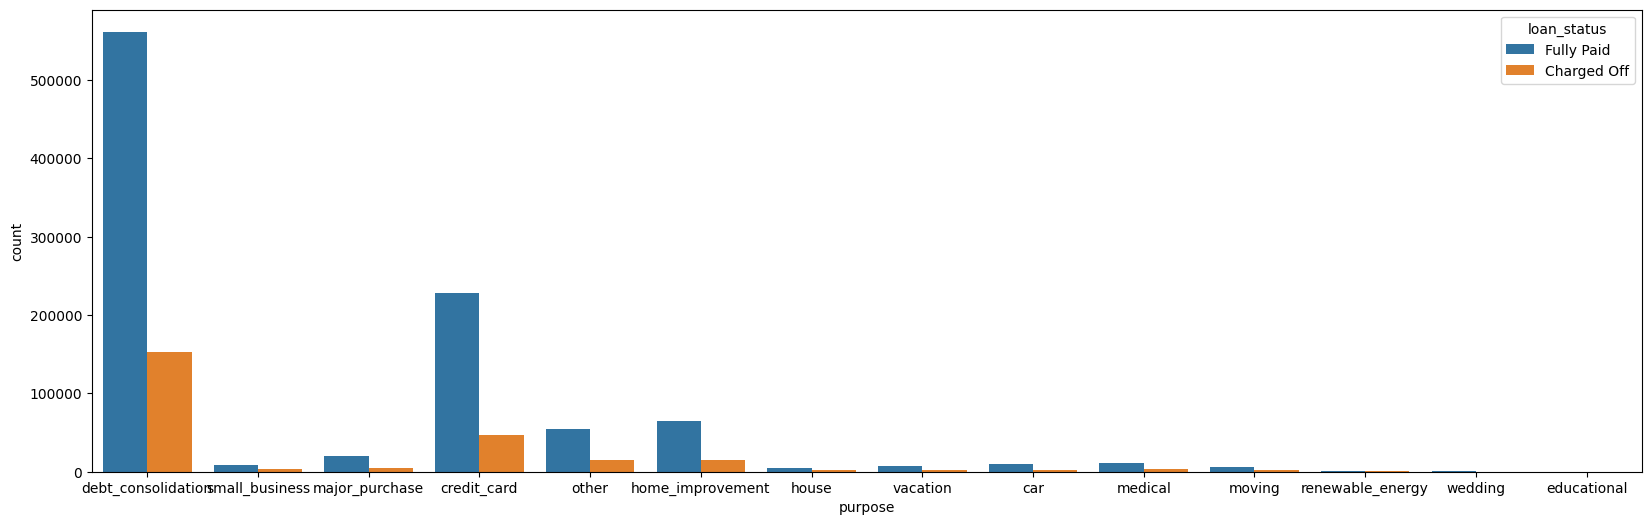

In [ ]:

plt.figure(figsize=(20,6))
sns.countplot(x = 'purpose', hue ='loan_status', data = df1)

In [ ]:
df1 = df1.drop('id', axis=1)

In [ ]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1225762 entries, 0 to 1225769
Data columns (total 77 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1225762 non-null  float64
 1   int_rate                    1225762 non-null  float64
 2   grade                       1225762 non-null  object 
 3   sub_grade                   1225762 non-null  object 
 4   home_ownership              1225762 non-null  object 
 5   annual_inc                  1225762 non-null  float64
 6   verification_status         1225762 non-null  object 
 7   loan_status                 1225762 non-null  object 
 8   purpose                     1225762 non-null  object 
 9   addr_state                  1225762 non-null  object 
 10  dti                         1225762 non-null  float64
 11  delinq_2yrs                 1225762 non-null  float64
 12  inq_last_6mths              1225762 non-null  float64
 13  mt

In [ ]:
#function to downsample majority class
def downsample_fully_paid_loan(df, target_col, ratio_to_keep_fully_paid=0.75, random_state=7):

    df_fuly_paid = df[df[target_col] == 0] # seperate fully paid and default loans dataframe
    df_default = df[df[target_col] == 1]

    print(df[target_col].value_counts()) #distribution of class
    print(f"total fully paid loans : {len(df_fuly_paid)}") #total number of fully paid loans
    print(f"total default loans: {len(df_default)}") #total number of default loans

    n_samples = int(len(df_fuly_paid) * ratio_to_keep_fully_paid) #number of samples to keep for further analysis , i.e., 75% of total fully paid loans to keep

     #downsample fully paid loan count
    df_fully_paid_downsampled = resample(df_fuly_paid,
                                       replace=False,    #
                                       n_samples=n_samples,  # 75 percent of fully paid loans
                                       random_state=random_state)  # for reproducible results

    #concatenate the two dataframes
    df_downsampled = pd.concat([df_fully_paid_downsampled, df_default])


    print("\nDownsampled loan class distribution after resampling:")
    print(df_downsampled[target_col].value_counts())

    #reset the index
    df_downsampled = df_downsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return df_downsampled #return the new dataframe



In [ ]:
dict = {'Charged Off': 1, 'Fully Paid':0}
df1['loan_status'] = df1['loan_status'].map(dict)

In [ ]:
df_downsampled = downsample_fully_paid_loan(df1, 'loan_status', ratio_to_keep_fully_paid=0.75, random_state=7)

loan_status
0    977977
1    247784
Name: count, dtype: int64
total fully paid loans : 977977
total default loans: 247784

Downsampled loan class distribution after resampling:
loan_status
0    733482
1    247784
Name: count, dtype: int64


In [ ]:
#percentage of data loose after removing 25% of the majority class data
length_of_df1= len(df1)
length_post_downsample = len(df_downsampled)
remaining_data_percent = (length_post_downsample / length_of_df1) * 100

print(f"\nPercentage of remaining data compared to initial data: {remaining_data_percent:.2f}%")
#75% of original majority class only 25% of majority class data is lost which is 20% of the total data.
#Now we will perform oversampling for minority class #this will be performed in Random forest and XGBoost baseline model


Percentage of remaining data compared to initial data: 80.05%


In [ ]:
df_downsampled.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,purpose_category,emp_length_years,term_years,fico_score,credit_history_years
0,70965709,24000.0,36 months,9.16,B,B2,MORTGAGE,76000.0,Not Verified,0,credit_card,UT,18.96,0.0,1.0,999.0,999.0,9.0,0.0,35610.0,92.7,25.0,2861.53,0.0,0.0,235379.0,0.0,1.0,0.0,0.0,30.0,8002.0,57.0,0.0,0.0,10377.0,83.0,38400.0,1.0,6.0,1.0,1.0,26153.0,3.0,100.0,0.0,0.0,131.0,261.0,103.0,18.0,4.0,107.0,2.0,0.0,3.0,7.0,3.0,4.0,7.0,7.0,14.0,7.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,248838.0,43612.0,18700.0,Cash,credit_card,10.0,3,707.0,21.75
1,109346752,4800.0,36 months,10.42,B,B3,MORTGAGE,32000.0,Verified,0,debt_consolidation,KS,11.70,0.0,0.0,999.0,999.0,6.0,0.0,8348.0,65.7,16.0,551.43,0.0,0.0,97429.0,0.0,0.0,0.0,0.0,76.0,0.0,-1.0,0.0,2.0,1860.0,66.0,12700.0,0.0,0.0,0.0,2.0,16238.0,464.0,90.9,0.0,0.0,84.0,116.0,24.0,24.0,1.0,24.0,5.0,0.0,3.0,5.0,3.0,6.0,2.0,5.0,13.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,105487.0,8348.0,5100.0,Cash,debt_consolidation,5.0,3,707.0,9.66
2,24655636,18900.0,36 months,12.99,C,C1,RENT,45000.0,Not Verified,1,debt_consolidation,VT,10.21,0.0,1.0,49.0,999.0,26.0,0.0,12500.0,65.8,37.0,2806.10,0.0,0.0,166746.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19000.0,-1.0,-1.0,-1.0,0.0,6413.0,3069.0,61.2,0.0,0.0,213.0,143.0,25.0,25.0,0.0,55.0,3.0,0.0,3.0,8.0,4.0,8.0,22.0,9.0,15.0,8.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,171546.0,166746.0,7900.0,Cash,debt_consolidation,7.0,3,672.0,17.75
3,78880342,10000.0,36 months,16.29,D,D1,RENT,70000.0,Source Verified,1,debt_consolidation,FL,22.80,0.0,0.0,65.0,999.0,7.0,0.0,2633.0,36.1,25.0,443.61,0.0,0.0,40251.0,1.0,4.0,4.0,7.0,2.0,37618.0,77.0,1.0,2.0,740.0,72.0,7300.0,2.0,5.0,1.0,9.0,5750.0,1458.0,36.6,0.0,0.0,80.0,62.0,12.0,2.0,0.0,12.0,12.0,1.0,2.0,3.0,2.0,2.0,21.0,3.0,4.0,3.0,0.0,0.0,5.0,96.0,50.0,0.0,0.0,56175.0,40251.0,2300.0,Cash,debt_consolidation,2.0,3,682.0,6.75
4,63294122,20000.0,60 months,13.18,C,C3,RENT,70000.0,Source Verified,0,debt_consolidation,MI,13.85,0.0,1.0,999.0,70.0,6.0,1.0,4317.0,29.8,22.0,5191.85,0.0,0.0,22860.0,-1.0,-1.0,-1.0,-1.0,999.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14500.0,-1.0,-1.0,-1.0,3.0,3810.0,7958.0,27.7,0.0,0.0,157.0,299.0,4.0,4.0,2.0,43.0,5.0,0.0,2.0,3.0,2.0,9.0,8.0,3.0,11.0,3.0,0.0,0.0,1.0,100.0,50.0,1.0,0.0,43085.0,22860.0,11000.0,Cash,debt_consolidation,2.0,5,667.0,25.00


In [ ]:
df_downsampled['loan_status'].value_counts()

,count
loan_status,
0,733482
1,247784


In [ ]:
# df_downsampled.to_csv('drive/My Drive/Dissertation/FINAL_balancedData.csv', index=False, encoding='utf-8')